# 1. Import data

In [42]:
import pandas as pd
data=pd.read_csv("C:\\Users\\KIIT\\Desktop\\ML Practice\\Dataset\\Machine Learning A-Z (Codes and Datasets)\\Part 2 - Regression\\Section 9 - Random Forest Regression\\Python\\Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# 2. EDA

In [43]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [45]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [46]:
# encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.iloc[:,0]=le.fit_transform(data.iloc[:,0])
data

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19036\821441185.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,0]=le.fit_transform(data.iloc[:,0])


,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000
5,7,6,150000
6,6,7,200000
7,9,8,300000
8,1,9,500000
9,2,10,1000000


# 3. Build Model

In [47]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [48]:
print(x)

[[ 0  1]
 [ 4  2]
 [ 8  3]
 [ 5  4]
 [ 3  5]
 [ 7  6]
 [ 6  7]
 [ 9  8]
 [ 1  9]
 [ 2 10]]


In [49]:
print(y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [50]:
# Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (8, 2)
y_train shape :  (8,)
x_test shape :  (2, 2)
y_test shape :  (2,)


In [51]:
# Train data
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

# 4. Model evaluation

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
test_acc=rf.score(x_test,y_test)
train_acc=rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Testing score : ",test_acc)
print("training score : ",train_acc)
print("mae : ",mae)
print("mse : ",mse)
print("rmse : ",rmse)

Testing score :  0.9973971111111111
training score :  0.9010464558013135
mae :  11325.0
mse :  131771250.0
rmse :  11479.165910465796


# 5. Result visualization

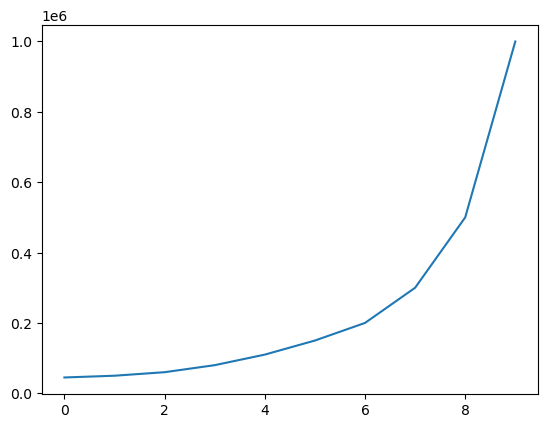

In [59]:
import matplotlib.pyplot as plt
#plt.plot(y_test)
#plt.plot(y_pred)
plt.plot(y)
plt.show()